In [1]:
! git clone https://github.com/hongtienhaolk2001/Graduate_Thesis.git
%cd /content/Graduate_Thesis/train
!pip install -r requirements.txt

Cloning into 'Graduate_Thesis'...
remote: Enumerating objects: 1187, done.
remote: Counting objects: 100% (395/395), done.
remote: Compressing objects: 100% (249/249), done.
remote: Total 1187 (delta 212), reused 285 (delta 122), pack-reused 792
Receiving objects: 100% (1187/1187), 65.04 MiB | 28.32 MiB/s, done.
Resolving deltas: 100% (495/495), done.
/content/Graduate_Thesis/train
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 83.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00
     ━━━

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from datasets import load_dataset
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, DataCollatorWithPadding
from vncorenlp import VnCoreNLP
from model.Model_2 import CustomModel
from preprocessing.NewsPreprocessing import Preprocess_2
from Trainer_2 import Trainer
from visualize import *

In [3]:
rdrsegmenter = VnCoreNLP("preprocessing/vncorenlp/VnCoreNLP-1.1.1.jar",
                          annotators="wseg", max_heap_size='-Xmx500m')
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
preprocess = Preprocess_2(tokenizer, rdrsegmenter)
data_files = {'train': r"./data/training_data_5_label/train_datasets.csv",
              'test': r"./data/training_data_5_label/test_datasets.csv"}
tokenized_datasets = preprocess.run(load_dataset('csv', data_files=data_files))
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
train_dataloader = DataLoader(tokenized_datasets["train"], batch_size=32, collate_fn=data_collator, shuffle=True)
valid_dataloader = DataLoader(tokenized_datasets["test"], batch_size=32, collate_fn=data_collator)

config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/3190 [00:00<?, ? examples/s]

Map:   0%|          | 0/354 [00:00<?, ? examples/s]

Map:   0%|          | 0/3190 [00:00<?, ? examples/s]

Map:   0%|          | 0/354 [00:00<?, ? examples/s]

Map:   0%|          | 0/3190 [00:00<?, ? examples/s]

Map:   0%|          | 0/354 [00:00<?, ? examples/s]

Map:   0%|          | 0/3190 [00:00<?, ? examples/s]

Map:   0%|          | 0/354 [00:00<?, ? examples/s]

In [4]:
trainer = Trainer(model=CustomModel("vinai/phobert-base"),
                  train_dataloader=train_dataloader,
                  valid_dataloader=valid_dataloader, )
train_f1_viz, eval_f1_viz, train_loss_viz, eval_loss_viz = trainer.training()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/content/Graduate_Thesis/train/metrics.py:25: RuntimeWarning: invalid value encountered in divide
  return TP / (TP + FP)


update model with f1 score 0.0
| End of epoch   1 | Time: 50.72s | Train F1    0.132 | Train Loss    4.116 | Valid F1    0.000 | Valid Loss    1.609 
-----------------------------------------------------------
update model with f1 score 0.17784393823997785
| End of epoch   2 | Time: 52.93s | Train F1    0.217 | Train Loss    3.674 | Valid F1    0.178 | Valid Loss    1.508 
-----------------------------------------------------------
update model with f1 score 0.534641975586802
| End of epoch   3 | Time: 54.00s | Train F1    0.384 | Train Loss    3.273 | Valid F1    0.535 | Valid Loss    1.331 
-----------------------------------------------------------
| End of epoch   4 | Time: 51.90s | Train F1    0.564 | Train Loss    2.826 | Valid F1    0.532 | Valid Loss    1.157 
-----------------------------------------------------------
update model with f1 score 0.6734393012345168
| End of epoch   5 | Time: 57.71s | Train F1    0.697 | Train Loss    2.353 | Valid F1    0.673 | Valid Loss    1.1

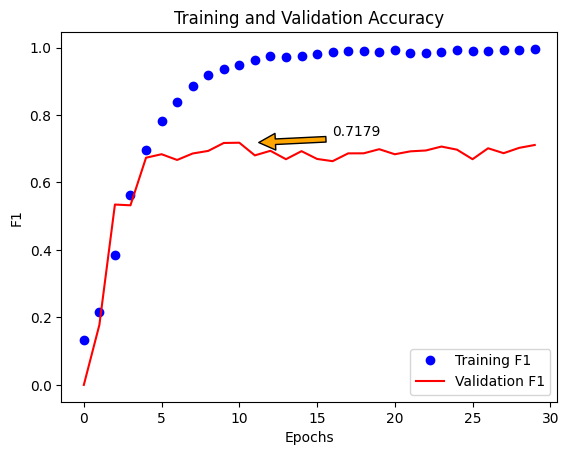

In [5]:
visualize_metric(train_f1_viz,  eval_f1_viz, epochs=30)

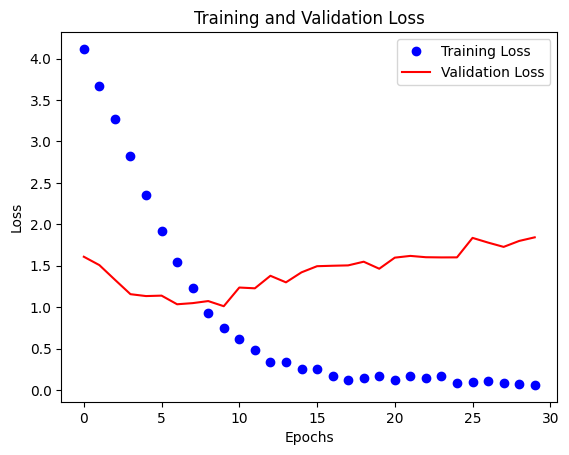

In [6]:
eval_loss_viz = [float(t.cuda()) for t in eval_loss_viz]
train_loss_viz = [float(t.cuda()) for t in train_loss_viz]
visualize_losses(train_loss_viz, eval_loss_viz, epochs=30)

# PhoBERT base version 2

In [3]:
rdrsegmenter = VnCoreNLP("preprocessing/vncorenlp/VnCoreNLP-1.1.1.jar",
                          annotators="wseg", max_heap_size='-Xmx500m')
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
preprocess = Preprocess_2(tokenizer, rdrsegmenter)
data_files = {'train': r"./data/training_data_5_label/train_datasets.csv",
              'test': r"./data/training_data_5_label/test_datasets.csv"}
tokenized_datasets = preprocess.run(load_dataset('csv', data_files=data_files))
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
train_dataloader = DataLoader(tokenized_datasets["train"], batch_size=32, collate_fn=data_collator, shuffle=True)
valid_dataloader = DataLoader(tokenized_datasets["test"], batch_size=32, collate_fn=data_collator)

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

/usr/local/lib/python3.10/dist-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


Generating test split: 0 examples [00:00, ? examples/s]

/usr/local/lib/python3.10/dist-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


Map:   0%|          | 0/3190 [00:00<?, ? examples/s]

Map:   0%|          | 0/354 [00:00<?, ? examples/s]

Map:   0%|          | 0/3190 [00:00<?, ? examples/s]

Map:   0%|          | 0/354 [00:00<?, ? examples/s]

Map:   0%|          | 0/3190 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/354 [00:00<?, ? examples/s]

Map:   0%|          | 0/3190 [00:00<?, ? examples/s]

Map:   0%|          | 0/354 [00:00<?, ? examples/s]

In [4]:
trainer = Trainer(model=CustomModel("vinai/phobert-base-v2"),
                  train_dataloader=train_dataloader,
                  valid_dataloader=valid_dataloader, )
train_f1_viz, eval_f1_viz, train_loss_viz, eval_loss_viz = trainer.training()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/content/Graduate_Thesis/train/metrics.py:25: RuntimeWarning: invalid value encountered in divide
  return TP / (TP + FP)


update model with f1 score 0.0
| End of epoch   1 | Time: 53.44s | Train F1    0.132 | Train Loss    4.116 | Valid F1    0.000 | Valid Loss    1.609 
-----------------------------------------------------------
update model with f1 score 0.17784393823997785
| End of epoch   2 | Time: 55.43s | Train F1    0.217 | Train Loss    3.674 | Valid F1    0.178 | Valid Loss    1.508 
-----------------------------------------------------------
update model with f1 score 0.534641975586802
| End of epoch   3 | Time: 57.30s | Train F1    0.384 | Train Loss    3.273 | Valid F1    0.535 | Valid Loss    1.331 
-----------------------------------------------------------
| End of epoch   4 | Time: 55.21s | Train F1    0.564 | Train Loss    2.826 | Valid F1    0.532 | Valid Loss    1.157 
-----------------------------------------------------------
update model with f1 score 0.6734393012345168
| End of epoch   5 | Time: 57.26s | Train F1    0.697 | Train Loss    2.353 | Valid F1    0.673 | Valid Loss    1.1

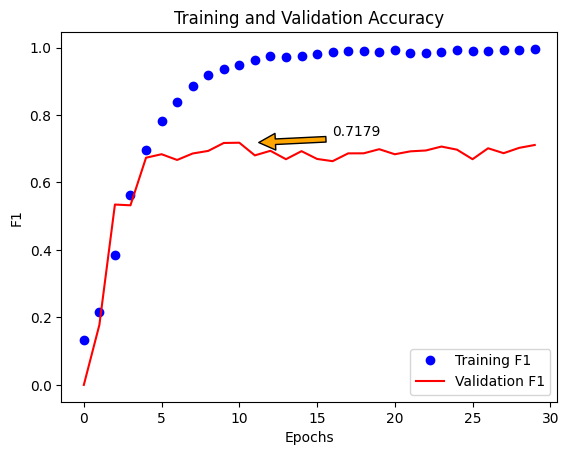

In [5]:
visualize_metric(train_f1_viz,  eval_f1_viz, epochs=30)

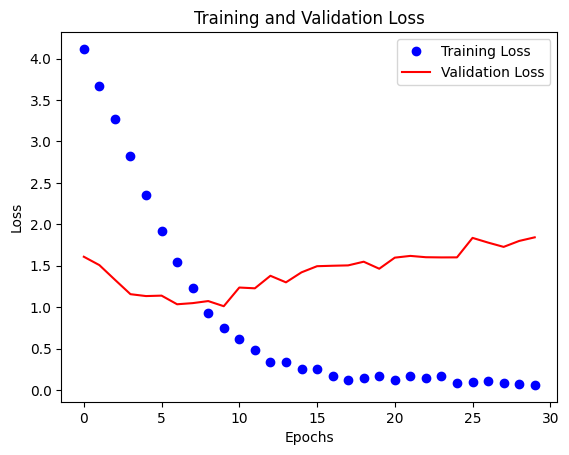

In [6]:
eval_loss_viz = [float(t.cuda()) for t in eval_loss_viz]
train_loss_viz = [float(t.cuda()) for t in train_loss_viz]
visualize_losses(train_loss_viz, eval_loss_viz, epochs=30)